# Kaggle: Titanic Competition

Link: https://www.kaggle.com/c/titanic

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [2]:
train_file = os.path.join('data', 'train.csv')
test_file = os.path.join('data', 'test.csv')

train_df = pd.read_csv(train_file, index_col='PassengerId')
test_df = pd.read_csv(test_file, index_col='PassengerId')

## Data Exploration & Cleaning

In [3]:
train_df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.00,NaN,S
143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.85,NaN,S
606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.55,NaN,S
589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.05,NaN,S
365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.50,NaN,Q
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.00,C93,S
285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.00,A19,S
596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.15,NaN,S


In [48]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

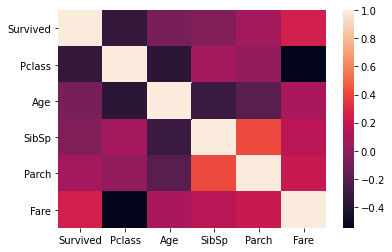

In [49]:
sns.heatmap(train_df.corr())

In [4]:
test_df.sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5000,C80,C
1272,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
1226,3,"Cor, Mr. Ivan",male,27.0,0,0,349229,7.8958,NaN,S
1177,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.2500,NaN,S
963,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S
1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1212,3,"Andersson, Mr. Johan Samuel",male,26.0,0,0,347075,7.7750,NaN,S
1207,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q
1026,3,"Dintcheff, Mr. Valtcho",male,43.0,0,0,349226,7.8958,NaN,S


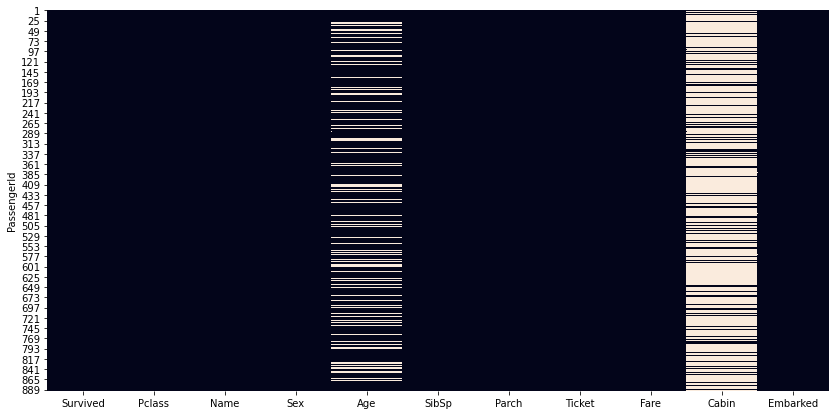

In [5]:
plt.figure(figsize=(14, 7))
sns.heatmap(train_df.isnull(), cbar=False)
plt.show()

## Turning ages into grouped categories

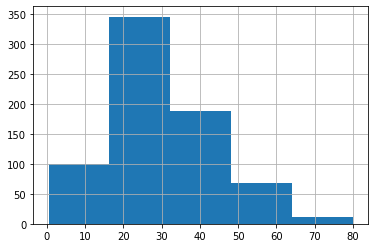

In [6]:
train_df['Age'].hist(bins=5)
plt.show()

In [7]:
pd.cut(train_df['Age'], bins=5)

PassengerId
1      (16.336, 32.252]
2      (32.252, 48.168]
3      (16.336, 32.252]
4      (32.252, 48.168]
5      (32.252, 48.168]
             ...       
887    (16.336, 32.252]
888    (16.336, 32.252]
889                 NaN
890    (16.336, 32.252]
891    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [8]:
labels = ['child', 'youngadult', 'adult', 'mature', 'elderly']
train_df['Age_Cat'] = pd.cut(train_df['Age'], bins=5, labels=labels)

In [9]:
train_df['Age_Cat'] = train_df['Age_Cat'].cat.add_categories('unknown').fillna('unknown')

In [10]:
train_df.sample(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat
PassengerId,,,,,,,,,,,,
307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,unknown
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,youngadult
153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,mature
326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C,adult
649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S,unknown
769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q,unknown
655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,youngadult
844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,adult
629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,youngadult


In [45]:
dummy_cols = ['Pclass', 'Age_Cat', 'Sex', 'SibSp', 'Parch', 'Embarked']
train_dummies = pd.get_dummies(train_df, columns=dummy_cols)
train_dummies.columns

Index(['Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Age_Cat_child', 'Age_Cat_youngadult',
       'Age_Cat_adult', 'Age_Cat_mature', 'Age_Cat_elderly', 'Age_Cat_unknown',
       'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [12]:
drop_cols_train = ['Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']
train_dummies = train_dummies.drop(labels=drop_cols_train, axis=1)

In [20]:
train_dummies.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_Cat_child',
       'Age_Cat_youngadult', 'Age_Cat_adult', 'Age_Cat_mature',
       'Age_Cat_elderly', 'Age_Cat_unknown', 'Sex_female', 'Sex_male',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [13]:
train_dummies.sample(10)

,Pclass_1,Pclass_2,Pclass_3,Age_Cat_child,Age_Cat_youngadult,Age_Cat_adult,Age_Cat_mature,Age_Cat_elderly,Age_Cat_unknown,Sex_female,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
24,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
508,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
136,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
692,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
400,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
57,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
755,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
152,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
437,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


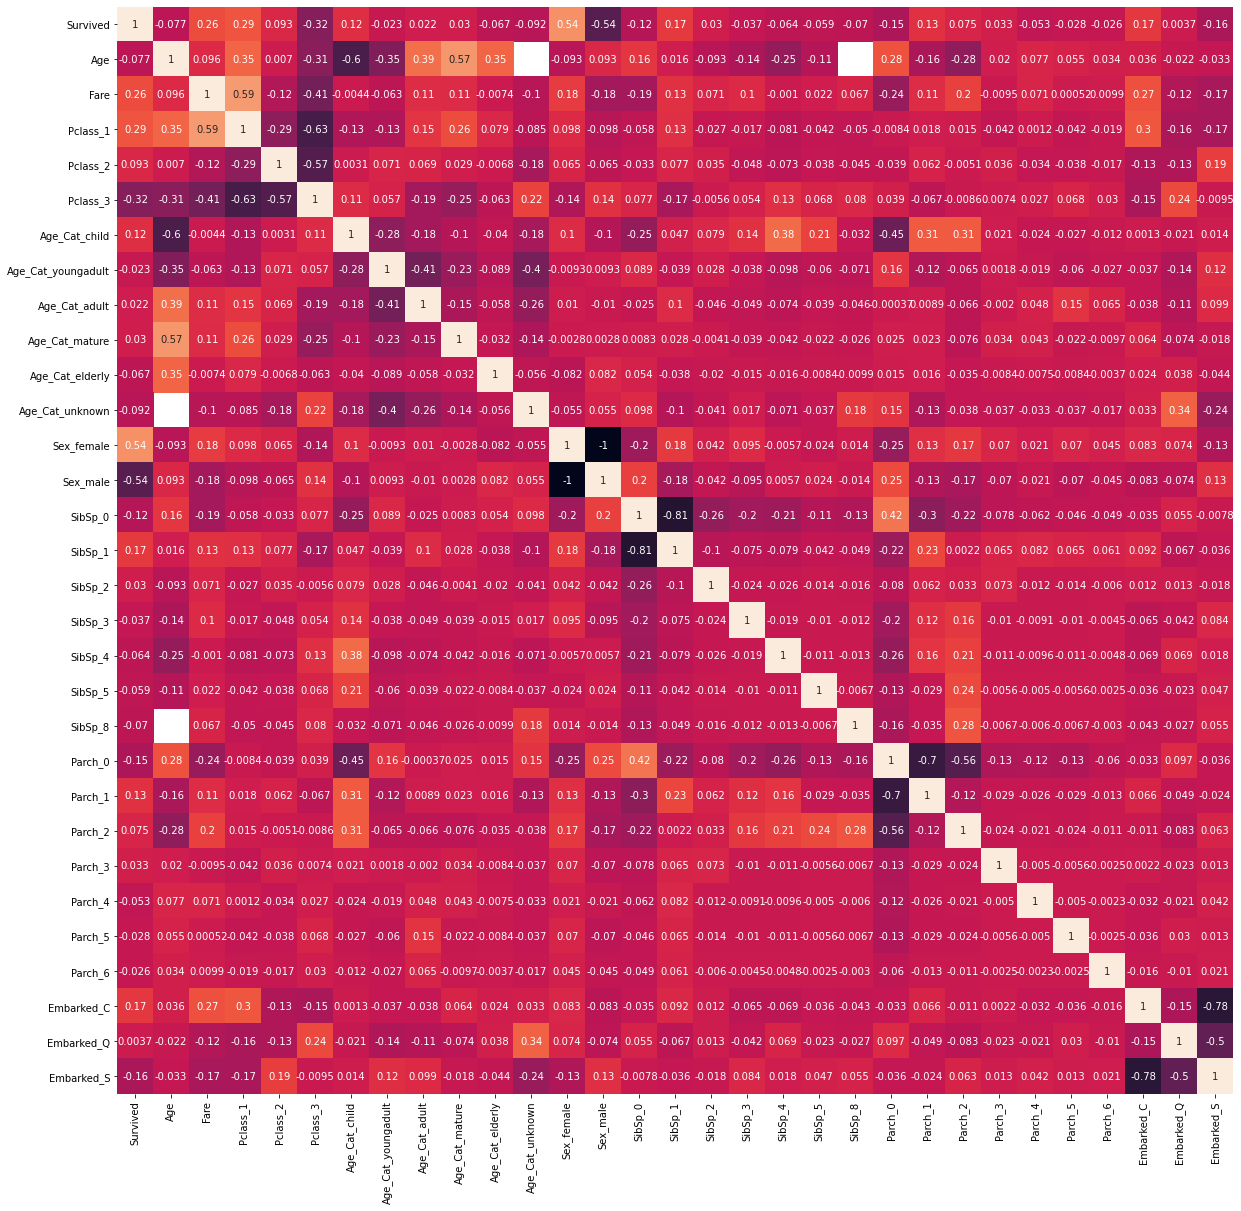

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(train_dummies.corr(), annot=train_dummies.corr(), cbar=False)
plt.show()

## Prepping the test data

In [15]:
test_df['Age_Cat'] = pd.cut(test_df['Age'], bins=5, labels=labels)
test_df['Age_Cat'] = test_df['Age_Cat'].cat.add_categories('unknown').fillna('unknown')
test_dummies = pd.get_dummies(test_df, columns=['Pclass', 'Age_Cat', 'Sex', 'SibSp', 'Parch', 'Embarked'])
drop_cols_test = ['Name', 'Age', 'Ticket', 'Fare', 'Cabin']
test_dummies = test_dummies.drop(labels=drop_cols_test, axis=1)

In [19]:
test_dummies.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_Cat_child',
       'Age_Cat_youngadult', 'Age_Cat_adult', 'Age_Cat_mature',
       'Age_Cat_elderly', 'Age_Cat_unknown', 'Sex_female', 'Sex_male',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [16]:
test_dummies.sample(10)

,Pclass_1,Pclass_2,Pclass_3,Age_Cat_child,Age_Cat_youngadult,Age_Cat_adult,Age_Cat_mature,Age_Cat_elderly,Age_Cat_unknown,Sex_female,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
994,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1203,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1023,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
971,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1240,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1225,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1032,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
992,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [44]:
test_dummies['Parch_9'].unique()

array([0, 1], dtype=uint64)

In [31]:
# copying Parch_6 to Parch_9
train_dummies['Parch_9'] = train_dummies['Parch_6']

In [32]:
train_dummies.sample(10)

,Pclass_1,Pclass_2,Pclass_3,Age_Cat_child,Age_Cat_youngadult,Age_Cat_adult,Age_Cat_mature,Age_Cat_elderly,Age_Cat_unknown,Sex_female,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Parch_9
PassengerId,,,,,,,,,,,,,,,,,,,,,
532,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
381,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
491,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
200,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
876,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
351,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
682,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
678,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Train the Random Forest model

In [35]:
y = train_df['Survived']
X = train_dummies
X_test = test_dummies

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.index, 'Survived': predictions})

In [36]:
output.sample(10)

,PassengerId,Survived
240,1132,1
194,1086,1
90,982,1
277,1169,0
347,1239,1
196,1088,1
163,1055,0
299,1191,0
17,909,0
203,1095,1


In [46]:
sub_path = os.path.join('data', 'submission.csv')
output.to_csv(sub_path, index=False)